### Problem 1
Generate two sine signals with different frequencies and phases. Generate linear combination of these signals, add small gaussian noise. Use FFT to find base frequencies used in the combined signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
t = np.linspace(0, 4*np.pi, 500)
x = 5*np.sin(2*np.pi*0.5*t + 1) + 2*np.sin(2*np.pi*5*t+3) + np.random.normal(0, 0.001,t.size)

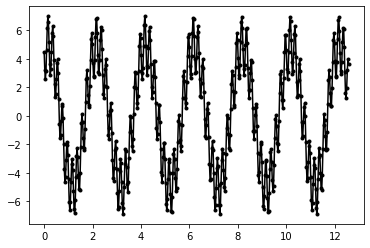

In [52]:
plt.plot(t, x, 'k.-')
plt.show()

In [53]:
fft = np.fft.fft(x)

In [54]:
spectrum = np.abs(fft)
freq = np.fft.fftfreq(t.size, t[1]-t[0])

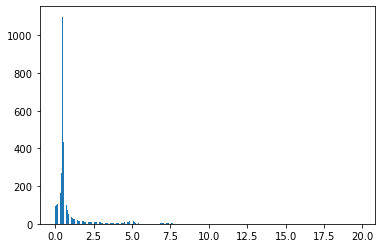

In [55]:
plt.bar(freq[:freq.size//2], spectrum[0:spectrum.size//2], width=0.05)
plt.show()

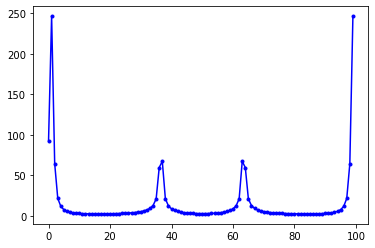

### Problem 2
Generate a sine wave with high frequency noise. Plot the spectrum of the signal. Filter the signal with moving average with different sizes of the window, plot the spectrum and filtered signal. 

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
t = np.linspace(0, 4*np.pi, 500)
x = 5*np.sin(2*np.pi*0.5*t + 1) + 0.5*np.sin(2*np.pi*10*t+3) + np.random.normal(0, 0.01,t.size)

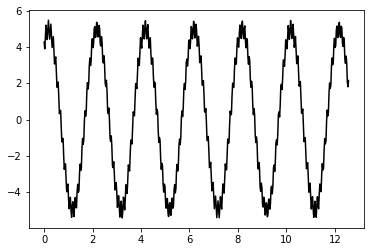

In [69]:
plt.plot(t, x, 'k-')
plt.show()

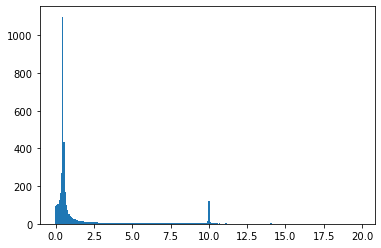

In [71]:
fft = np.abs(np.fft.fft(x))[:x.size//2]
freq = np.fft.fftfreq(t.size, t[1]-t[0])[:t.size//2]

plt.bar(freq, fft, width=0.08)
plt.show()

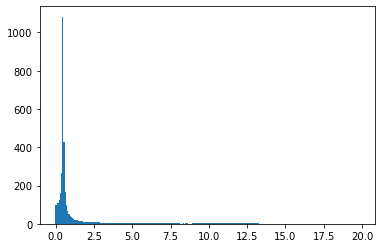

In [84]:
k = 4

y = x.copy()
for i in range(k, x.size-k):
    y[i] = x[i-k:i+k].mean()

yfft = np.abs(np.fft.fft(y))[:x.size//2]

plt.bar(freq, yfft, width=0.08)
plt.show()

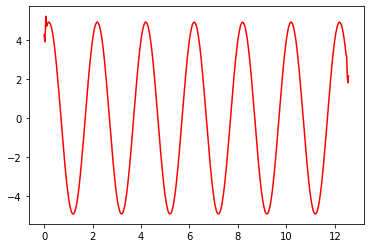

In [85]:
plt.plot(t, y, 'r-')
plt.show()

### Problem 3

Load an image (any image, for instance `skimage.data.camera()`) and add salt-and-pepper noise. 
Implement 
- mean filter
- median filter
- conservative smoothing. 

Show the image filtered with both filters. Try various sizes of the filters.

In [86]:
import numpy as np
import skimage

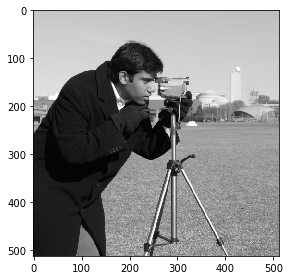

In [99]:
img = skimage.data.camera()/255

skimage.io.imshow(img)
plt.show()

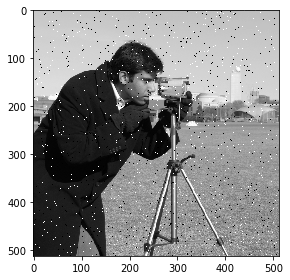

In [100]:
noise = np.random.random(img.shape)
img[noise>0.99] = 1
img[noise<0.01] = 0

skimage.io.imshow(img)
plt.show()

In [91]:
def mean_filter(img, r):
    res = img.copy()
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            res[i,j] = img[i-r:i+r, j-r:j+r].mean()
    return res

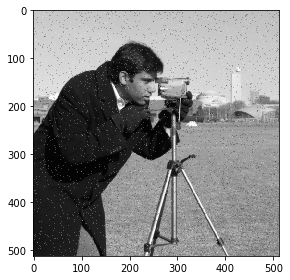

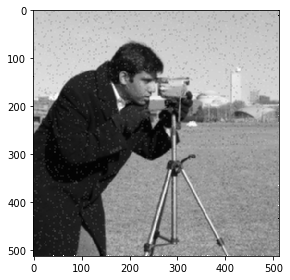

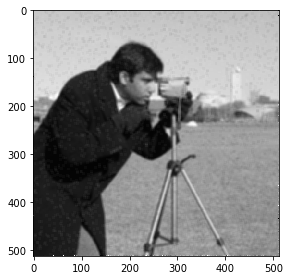

In [93]:
for r in [1,2,3]:
    skimage.io.imshow(mean_filter(img, r))
    plt.show()

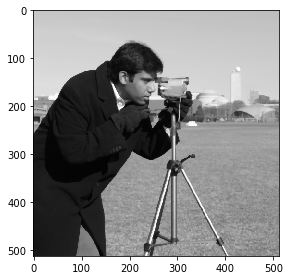

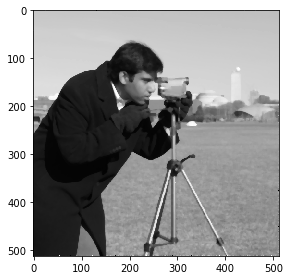

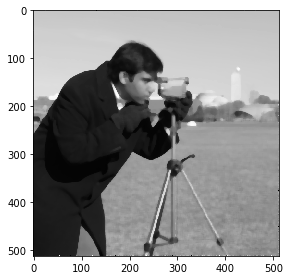

In [101]:
def median_filter(img, r):
    res = img.copy()
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            res[i,j] = np.median(img[i-r:i+r+1, j-r:j+r+1])
    return res

for r in [1,2,3]:
    skimage.io.imshow(median_filter(img, r))
    plt.show()

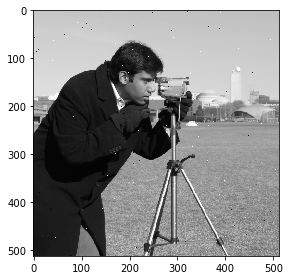

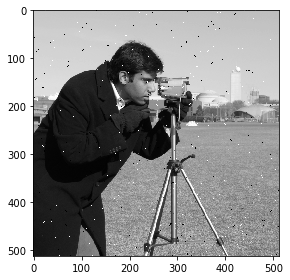

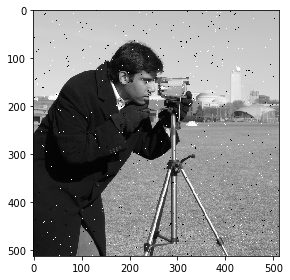

In [103]:
def cons_filter(img, r):
    res = img.copy()
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            neighborhood = img[i-r:i+r+1, j-r:j+r+1].copy()
            neighborhood[r, r] = neighborhood[0,0]
            maxv, minv = neighborhood.max(), neighborhood.min()
            if img[i,j]>maxv:
                res[i,j] = maxv
            elif img[i,j]<minv:
                res[i,j]=minv
            else:
                res[i,j] = img[i,j]
    return res

for r in [1,2,3]:
    skimage.io.imshow(cons_filter(img, r))
    plt.show()

### Problem 4
Read the image (any image, for instance `skimage.data.camera()`) as a grayscale image, perform low-pass filtering by performing FFT, zeroing-out all frequencies but small ones and performing inverse FFT. Plot original image, filtered image and amplitude of fft.

Useful functions: `np.fft.fft2`, `np.fft.fftshift`, `np.fft.ifft2`

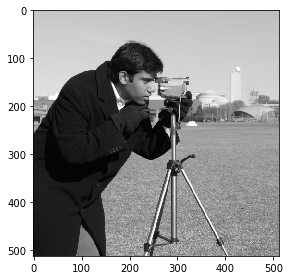

In [104]:
img = skimage.data.camera()/255

skimage.io.imshow(img)
plt.show()

In [131]:
fft = np.fft.fftshift(np.fft.fft2(img))
scaled_fft = np.log(np.abs(fft)+1)

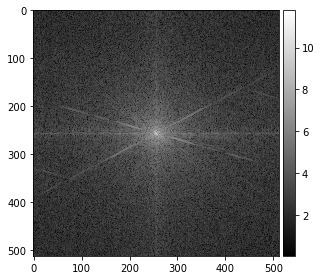

In [127]:
skimage.io.imshow(scaled_fft, cmap='gray')
plt.show()

In [132]:
r = 25
ci, cj = fft.shape[0]//2, fft.shape[1]//2
for i in range(fft.shape[0]):
    for j in range(fft.shape[1]):
        d = np.sqrt((i-ci)**2 + (j-cj)**2)
        if d>r:
            fft[i,j] = 0

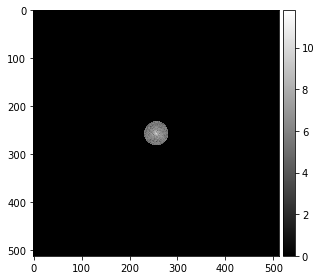

In [133]:
scaled_fft = np.log(np.abs(fft)+1)
skimage.io.imshow(scaled_fft, cmap='gray')
plt.show()

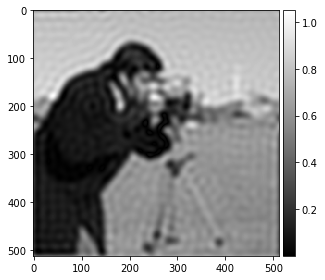

In [134]:
fimg = np.abs(np.fft.ifft2(fft))
skimage.io.imshow(fimg, cmap='gray')
plt.show()

### Problem 5
Read the image, implement unsharp filter, apply to the image.